In [8]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [10]:
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /content/sample_data//sarcasm.json

--2020-06-19 03:54:45--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 2a00:1450:4013:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/content/sample_data//sarcasm.json’

/content/sample_dat 100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2020-06-19 03:54:46 (146 MB/s) - ‘/content/sample_data//sarcasm.json’ saved [5643545/5643545]



In [12]:
with open('/content/sample_data/sarcasm.json','r') as f:
  data=json.load(f)

In [39]:
VOCAB_SIZE=10000
EMBEDDING_DIM=16
EPOCHS=30
TRUNC_TYPE='post'
MAX_LEN=100
PADD_TYPE='post'
OOV_TOKEN='<OOV>'
TRAIN_SIZE=20000

In [14]:
sentences=[]
labels=[]
for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [29]:
print(len(sentences))
print(sentences[0])
print(labels[0])

26709
former versace store clerk sues over secret 'black code' for minority shoppers
0


In [31]:
train_sentences = sentences[0:TRAIN_SIZE]
test_sentences = sentences[TRAIN_SIZE:]
train_labels = labels[0:TRAIN_SIZE]
test_labels = labels[TRAIN_SIZE:]

In [32]:
print(len(train_sentences))
print(len(test_sentences))

20000
6709


In [33]:
tokenizer=Tokenizer(num_words=VOCAB_SIZE,oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(train_sentences)
word_index=tokenizer.word_index

train_seq=tokenizer.texts_to_sequences(train_sentences)
train_pad=pad_sequences(train_seq,truncating=TRUNC_TYPE,padding=PADD_TYPE,maxlen=MAX_LEN)

test_seq=tokenizer.texts_to_sequences(test_sentences)
test_pad=pad_sequences(test_seq,truncating=TRUNC_TYPE,padding=PADD_TYPE,maxlen=MAX_LEN)

In [36]:
import numpy as np
train_pad = np.array(train_pad)
train_labels = np.array(train_labels)
test_pad = np.array(test_pad)
test_labels = np.array(test_labels)

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(train_pad, train_labels,
                    epochs=EPOCHS, 
                    validation_data=(test_pad, test_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6713 - accuracy: 0.5803 - val_loss: 0.5934 - val_accuracy: 0.7208
Epoch 2/30
625/625 - 2s - loss: 0.4265 - accuracy: 0.8314 - val_loss: 0.3853 - val_accuracy: 0.8316
Epoch 3/30
625/625 - 2s - loss: 0.3047 - accuracy: 0.8786 - val_loss: 0.3498 - val_accuracy: 0.8523
Epoch 4/30
625/625 - 2s - loss: 0.2525 - accuracy: 0.9010 - val_loss: 0.3471 - val_accuracy: 0.8533
Epoch 5/30
625/625 - 2s - loss: 0.2174 - accuracy: 0.9151 - val_loss: 0.3435 - val_accuracy: 0.8548
Epoch 6/30
625/625 - 3s - loss: 0.1908 - accuracy: 0.9262 - val_loss: 0.3562 - val_accuracy: 0.8536
Epoch 7/30
625/625 - 2s - loss: 0.1684 - accuracy: 0.9369 - val_loss: 0.3668 - val_accuracy: 0.8535
Epoch 8/30
625/625 - 2s - loss: 0.1504 - accuracy: 0.9441 - val_loss: 0.3847 - val_accuracy: 0.8530
Epoch 9/30
625/625 - 2s - loss: 0.1351 - accuracy: 0.9510 - val_loss: 0.4051 - val_accuracy: 0.8509
Epoch 10/30
625/625 - 3s - loss: 0.1211 - accuracy: 0.9570 - val_loss: 0.4307 - val_accuracy: 0.8465

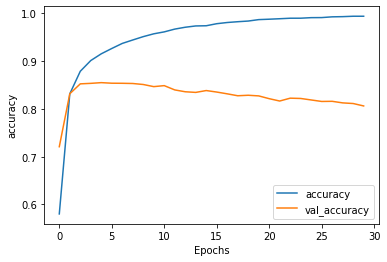

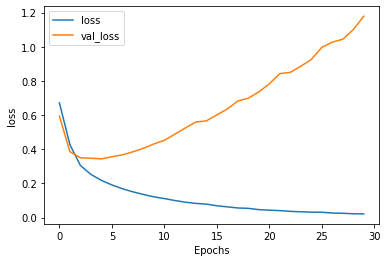

In [42]:
import matplotlib.pyplot as plt

#overfit data
def plot_graphs(history, string):
  his=history.history
  plt.plot(his[string])
  plt.plot(his['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")